## Environment

I am using Ubuntu 18.04.1 LTS and Anaconda to create environments


1.Create the environment from the environment.yml file:

conda env create -f environment.yml


2.To use the spec file to create an identical environment on the same machine or another machine:

conda create --name myenv --file spec-file.txt

# K-means Clustering

K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.
This results in a partitioning of the data space into Voronoi cells.

### Import resources and display image

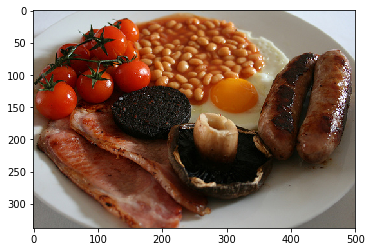

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from io import BytesIO
import PIL
from IPython.display import display, Image
%matplotlib inline

image = cv2.imread('a2.jpg')

# Change color to HSV (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

plt.imshow(image)

In [18]:


def display_img_array(ima):
    im = PIL.Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png'))

### Prepare data for k-means

In [19]:
# Reshape image into a 2D array of pixels and 3 color values 
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

### Implement k-means clustering

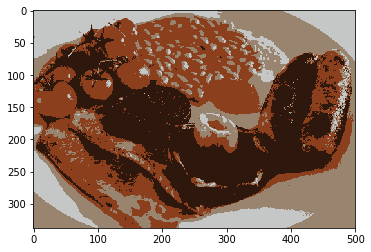

In [20]:

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, 2)


# then perform k-means clustering
k = 4
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 14, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

copyCluster= labels_reshape

plt.imshow(segmented_image)

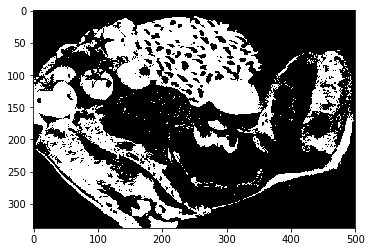

In [21]:

plt.imshow(labels_reshape==1, cmap='gray')

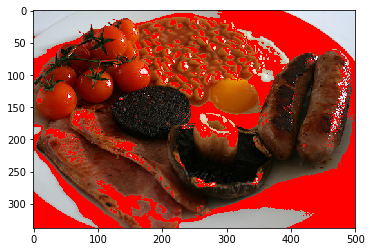

In [23]:
#mask an image segment by cluster



masked_beans = np.copy(image)
# turn the mask red!
masked_beans[copyCluster == 0] = [255, 0, 0]

plt.imshow(masked_beans)

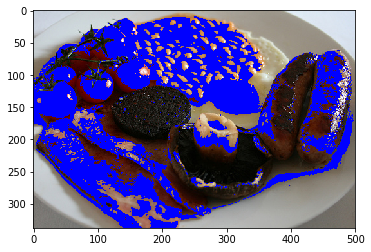

In [24]:
# mask an image segment by cluster

masked_image2 = np.copy(image)
# turn the mask blue!
masked_image2[copyCluster == 1] = [0, 0, 255]

plt.imshow(masked_image2)

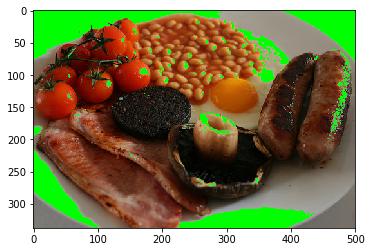

In [25]:
# mask an image segment by cluster

masked_image3 = np.copy(image)
# turn the mask green!
masked_image3[copyCluster == 2] = [0, 255, 0]

plt.imshow(masked_image3)

## HSV Color Space

In this part i search a range of one color in image and i create a mask, and use it to crop, or to filter an image

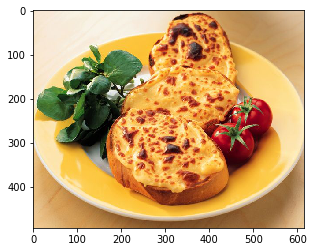

In [26]:
%matplotlib inline

# Read in the image
image = cv2.imread('a1.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

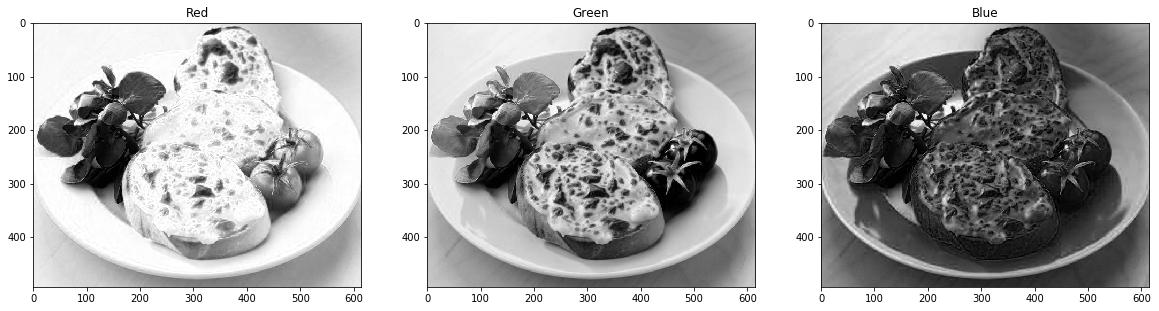

In [27]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')


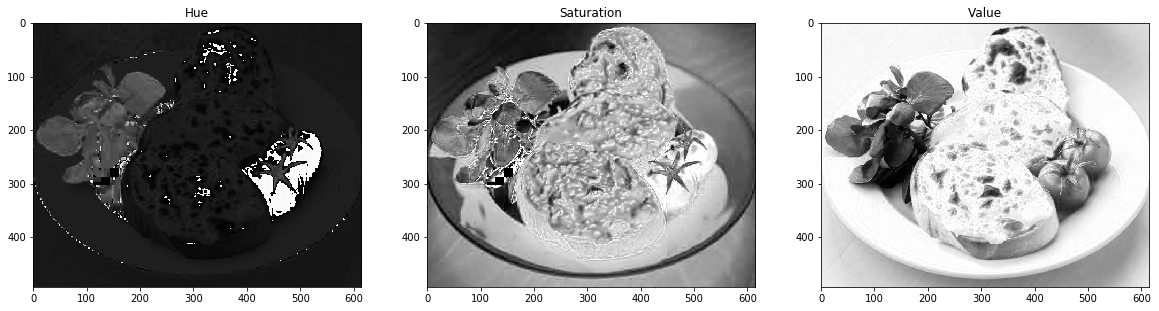

In [28]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')


In [29]:
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])

In [30]:

lower_green = np.array([50,60,60])
upper_green = np.array([100,255,255])

I am creating a mask for red color , i search it and paint it with blu color

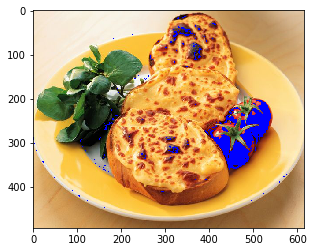

In [31]:
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image_red = np.copy(image)
masked_image_red[mask_hsv !=0] = [0,0,255]

# Vizualize the mask
plt.imshow(masked_image_red)


I am creating a mask for green color , i search it and paint it with red color

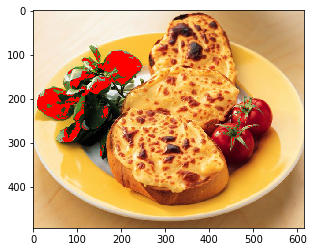

In [32]:
mask_hsv = cv2.inRange(hsv, lower_green, upper_green)

# mask the image
masked_image_green = np.copy(image)
masked_image_green[mask_hsv !=0] = [255,0,0]

# Vizualize the mask
plt.imshow(masked_image_green)

In [33]:
Final_image_red = image - masked_image_red 

In [34]:
Final_image_green = image - masked_image_green

In [35]:
Final_red_blu=Final_image_red + Final_image_green

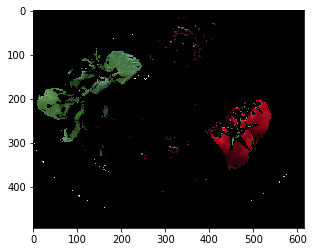

In [36]:
plt.imshow(Final_red_blu)

In the end i tried to find tommato and the green flower